# **EDA : Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
import joblib

# Load the dataset
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')

# Convert 'DOJ' and 'CURRENT DATE' to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Calculate years of experience in the company
df['YEARS IN COMPANY'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365

# Drop unnecessary columns
df.drop(columns=['FIRST NAME', 'LAST NAME', 'DOJ', 'CURRENT DATE'], inplace=True)

<ipython-input-18-97f84dd36924>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='UNIT', y='SALARY', data=df, ci=None)


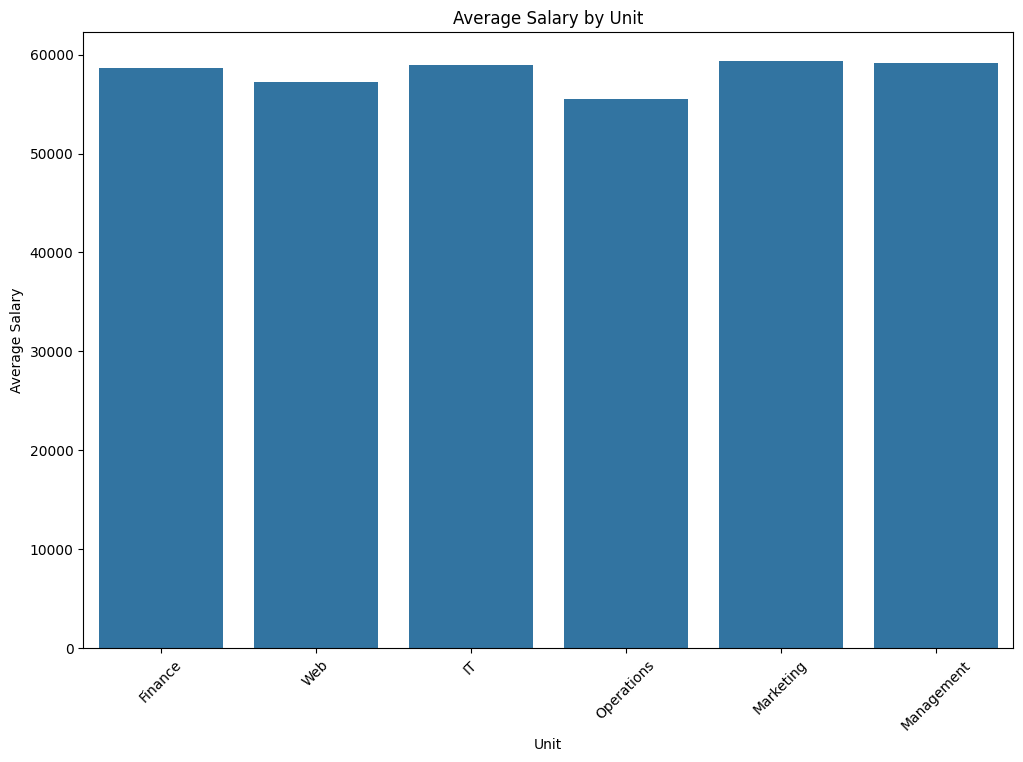

In [ ]:
#Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='UNIT', y='SALARY', data=df, ci=None)
plt.title('Average Salary by Unit')
plt.xlabel('Unit')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

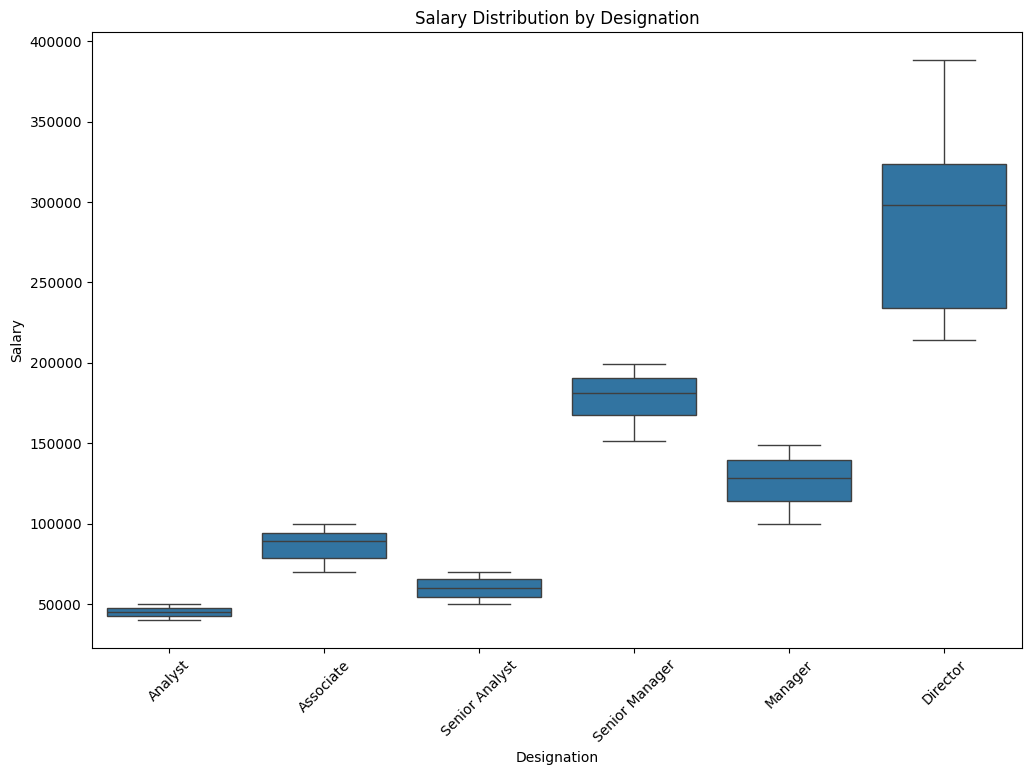

In [ ]:
#Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df)
plt.title('Salary Distribution by Designation')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

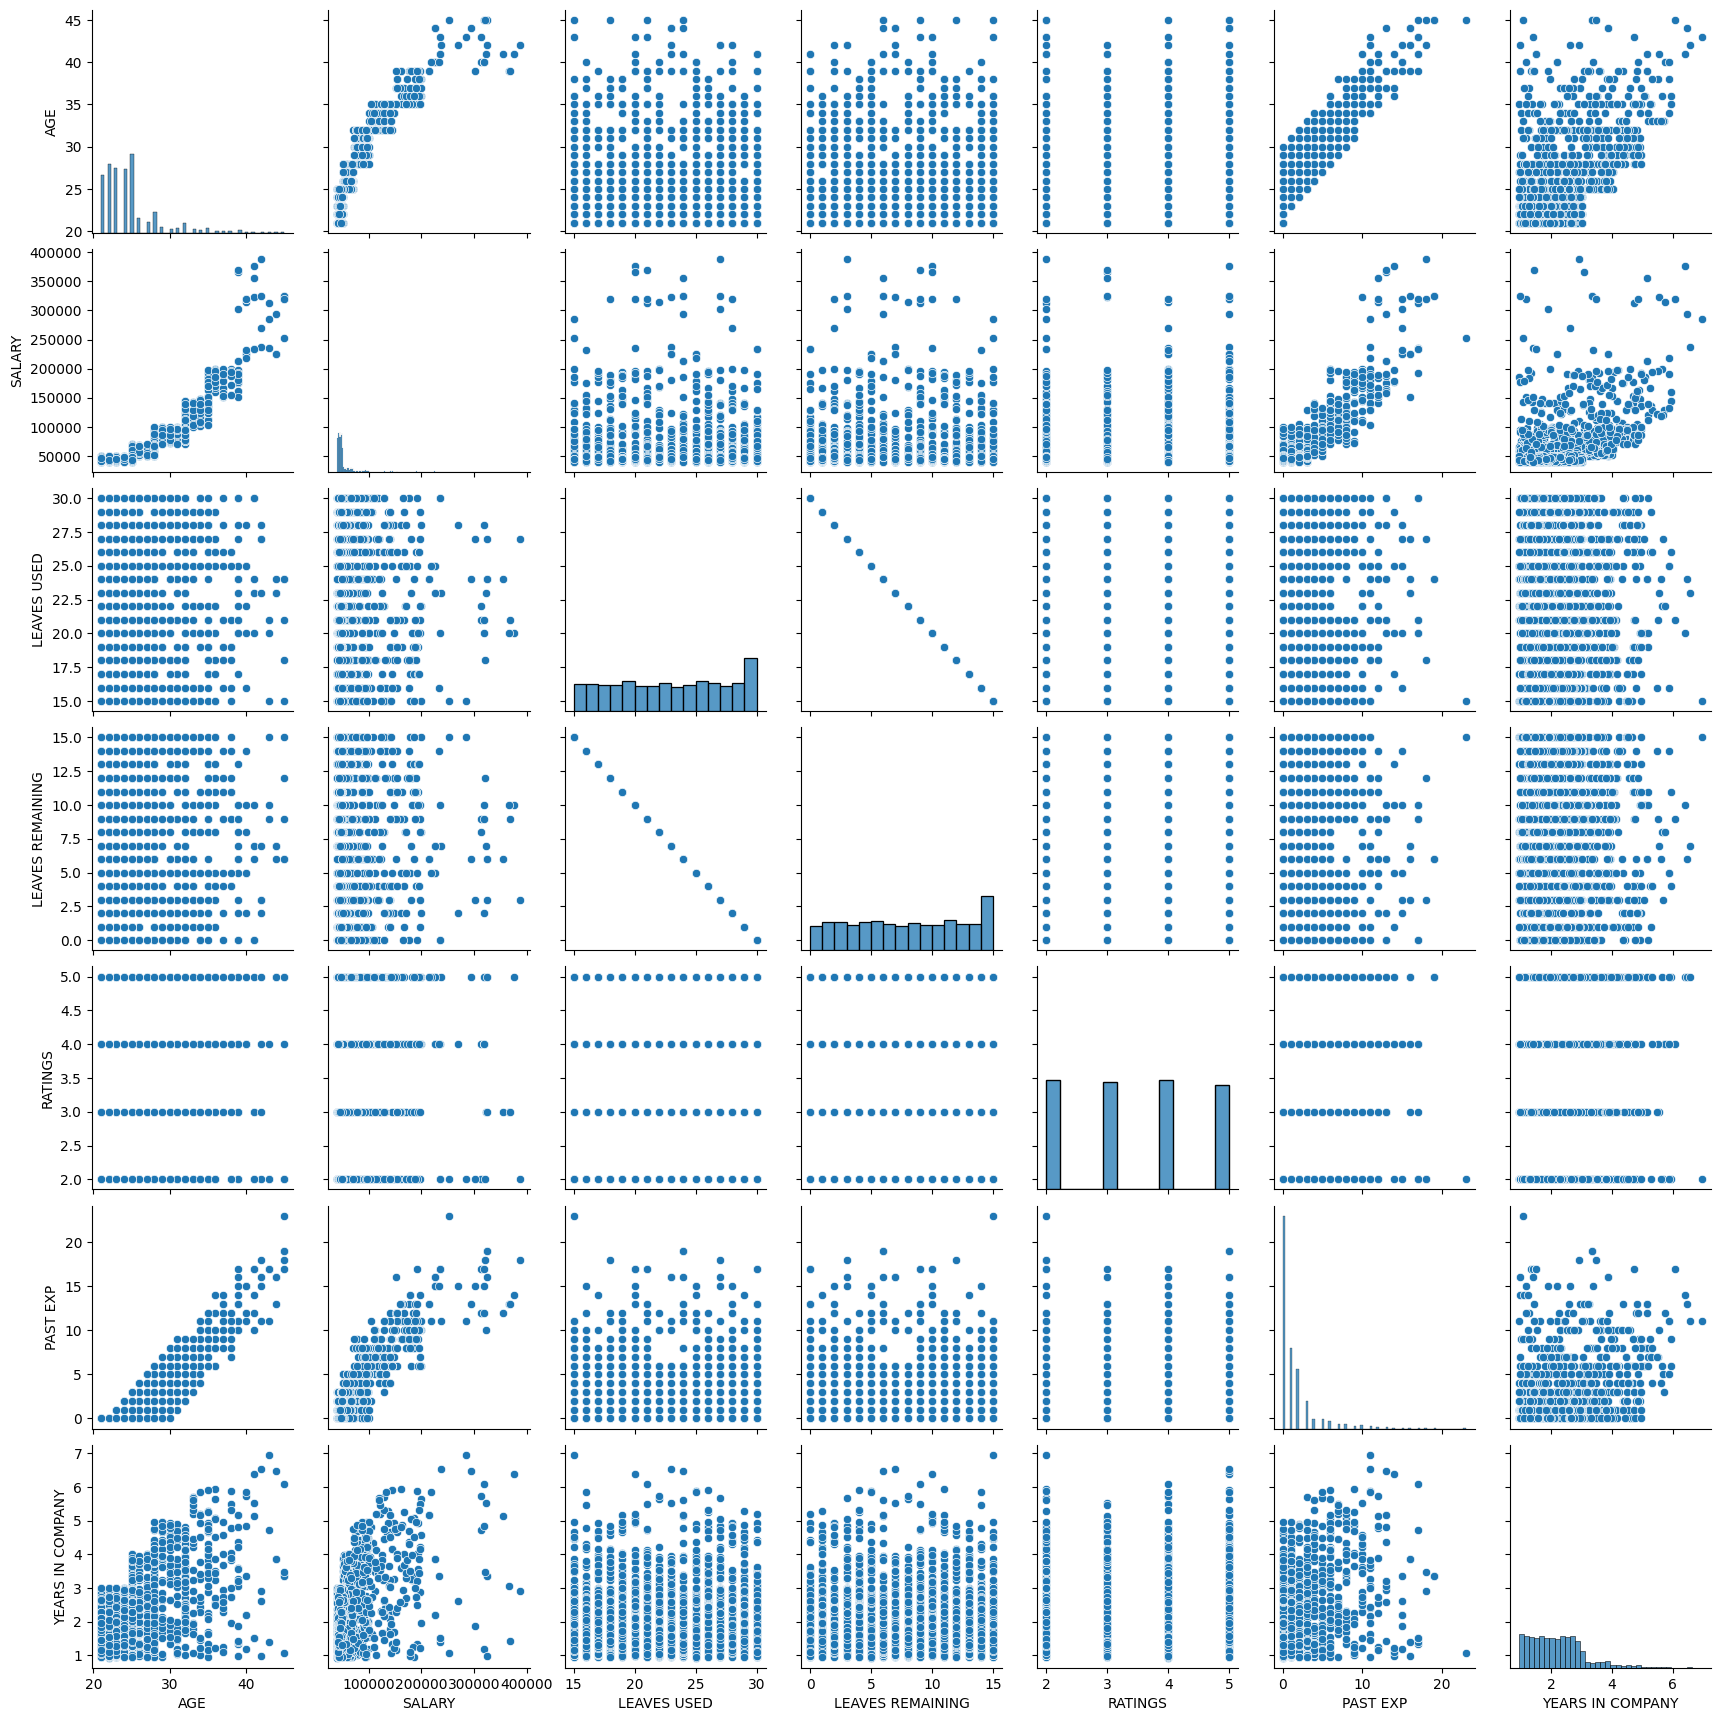

In [ ]:
#Pair Plot
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()

# **3. Data Preprocessing:**

In [ ]:
# Separate features and target variable
X = df.drop('SALARY', axis=1)
y = df['SALARY']

# Define categorical and numerical columns
categorical_cols = ['SEX', 'DESIGNATION', 'UNIT']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# **4. Machine Learning Model Development and Model Evaluation**

In [ ]:
# Create a column transformer with pipelines for numerical and categorical preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

# Preprocess the features
X_preprocessed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the Linear Regression model (since it performed the best)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Linear Regression Performance:
MAE: 4632.248243766874
MSE: 96414520.67236406
RMSE: 9819.08960506849
R2 Score: 0.9419377442857355


# **5. Model Deployment**

In [ ]:
# Save the trained model and preprocessor using joblib (for deployment purposes)
dump(model, 'best_salary_predictor_model.joblib')
model = load('best_salary_predictor_model.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')

# Function to make predictions using the best model
def predict_salary(new_data):
    # Load the preprocessor and model
    preprocessor = joblib.load('preprocessor.joblib')

    # Convert new data to DataFrame
    new_data_df = pd.DataFrame([new_data])

    # Preprocess the new data
    new_data_preprocessed = preprocessor.transform(new_data_df)

    # Make prediction
    prediction = model.predict(new_data_preprocessed)
    return prediction[0]

# Example usage of the predict_salary function
new_data = {
    'SEX': 'M',
    'AGE': 32,
    'PAST EXP': 6,
    'LEAVES USED': 3,
    'LEAVES REMAINING': 22,
    'RATINGS': 4.3,
    'YEARS IN COMPANY': 2.5,
    'DESIGNATION': 'Data Analyst',
    'UNIT': 'DS'
}
predicted_salary = predict_salary(new_data)
print(f"Predicted Salary: {predicted_salary}")


Predicted Salary: 132469.08777216246
